<a href="https://colab.research.google.com/github/RafiKepecs/Bayesian-Machine-Learning/blob/main/Project%201%3A%20Conjugate%20Prior/BayesML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Conjugate Priors

### Setup

In [ ]:
from scipy.stats import beta, gamma, norm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import random

# Part 1: Estimating Probability of Binomial RV

### Select Model Parameters

Model parameters a0 and b0 correspond to the prior beta estimation of coin's heads-probability.

N is the number of simulated coin flips, and p is the probability of an individual coin flip showing heads.

In [ ]:
# Prior beta distribution parameters
a0 = 30
b0 = 10

# Coin flip parameters
N = 500
p = .3

### Generate Coin-Flip Results

Perform N coin flips, using the flip(p) function defined below, returning 1 (heads) with a probability of p.

Record results in binary list "flips", and calculate values of a and b after each flip.

In [ ]:
# Biased coin flip function (returns 1 (i.e. - heads) with probability p)
def flip(p):
    return random() < p

# Flip coin N times
flips = [flip(p) for i in range(N)]

### Calculations

Calculate the a[n] and b[n] values of the beta distribution after each coin flip

In [ ]:
# Total heads at after each flip
m = [0] + [sum(flips[:i]) for i in range(N)]

# a and b values after each flip [ a = a0 + m;    b = b0 + (N-m) ]
a = [a0 + m[i] for i in range(N)]
b = [b0 + (i - m[i]) for i in range(N) ]

### Plot Results

Plot the prior and posterior beta distributions of the estimated heads-probability of the coin

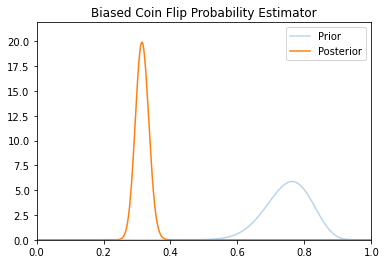

In [ ]:
fig, ax = plt.subplots()

# Probability-axis
x = np.linspace(0, 1, 1000)

# y-data of initial and final estimator distributions
y0 = beta.pdf(x, a0, b0)
yf = beta.pdf(x, a[-1], b[-1])

# Plot prior distribution (semi-transparent, in background)
l0 = plt.plot(x, y0, alpha=.3)

# Plot posterior distribution
# Also initializes distribution variable for use in animation function
distribution = plt.plot(x, yf)[0]

# Set axis limits
# Assume maximum y-value occurs in initial or final distribution
max_y = max(y0 + yf) + 2
ax = plt.axis([0, 1, 0, max_y])

# Format plot
plt.title('Biased Coin Flip Probability Estimator')
plt.legend(['Prior', 'Posterior'])
plt.show()

### Create Animation

Show the evolution of the beta distribution, starting from the prior, as new coin-flip data is added to the model.


In [ ]:
# Animation function
def animate(i):
    
    # Find beta distribution for current a/b values
    y = beta.pdf(x, a[i], b[i])
    
    # Update distribution variable
    distribution.set_data(x, y)
    
    return distribution,


# Create animation
anim = animation.FuncAnimation(fig, animate, frames = N, interval = 50, blit = True) 

# Save animation
anim.save('movie.mp4', writer = 'ffmpeg', fps = 60)

# Part 2: Estimating the Distribution of a Gaussian RV

## A) Estimating Mean of Gaussian With Known Variance

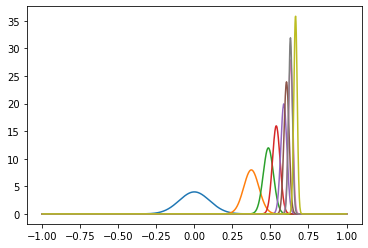

In [ ]:

N = 10

xg = np.linspace(-1, 1, 1000)

var_ground_truth = 0.1

mean_ground_truth = 0.8

flips_gaussian = np.random.normal(mean_ground_truth , var_ground_truth , N) 

var_prior = var_ground_truth

# Total heads at after each flip
m = [sum(flips_gaussian[:i]) for i in range(N)]

mean_max_likelihood = [1/i * m[i] for i in range(1,N)]

var_likelihood = var_ground_truth 

mean_prior = 0

yg0 = norm.pdf(xg,mean_prior, var_prior)

plt.plot(xg,yg0)

for i in range(1, N-1):
    mean_current = var_ground_truth/(i*var_prior+var_ground_truth)*mean_prior + (i*var_prior)/(i*var_prior+var_ground_truth)*mean_max_likelihood[i]
    var_current = 1/(1/var_prior+i/var_ground_truth)
    yg = norm.pdf(xg,mean_current,var_current)
    plt.plot(xg,yg)

## B) Estimating Variance of Gaussian With Known Mean

Ok, so something here is obviously wrong. Not sure what.

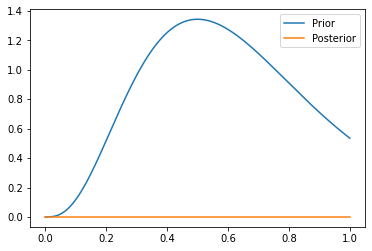

In [ ]:
# Prior gamma distribution parameters
a0 = 4
b0 = 6

# Gaussian RV sample parameters
mu = 100
var = 15
N = 300

# Generate Data
data = np.random.normal(mu, var, N)

# Calculate most likely variance after the addition of each data point
sq_err = [(data[i] - mu)**2 for i in range(N)]
var_ML = [ sum(sq_err[:i+1]) for i in range(N)]

# Calculate a and b after the addition of each data point
a = [a0 + i/2 for i in range(N)]
b = [b0 + (i/2)*var_ML[i] for i in range(N)]

# Calculate prior and posterior gamma distributions
x = np.linspace(0, 1, 1000)
y0 = gamma.pdf(x, a0, scale=1/b0, )
yf = gamma.pdf(x, a[-1], scale=1/b[-1])

# Plot
plt.plot(x, y0)
plt.plot(x, yf)
plt.legend(['Prior', 'Posterior'])

## C) Estimating Both Mean and Variance of Gaussian